In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('Titanic_dataset.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# We have 891 rows and 12 column 
# PassengerId - There is no missing value رقم تعريف الراكب
# Pclass - There is no missing value درجة التذكرة (1، 2، 3)
# Survived إذا كان الراكب نجا أو لا)
# Name - There is no missing value اسم الراكب
# Sex - There is no missing value جنس الراكب
# Age - 891-714 = There is 177 rows عمر الراكب
# SibSp - There is no missing value  # عدد الاخوة او الازواج
# Parch - There is no missing value  # عدد الآباء/الأبناء على متن السفينة
# Ticket -  There is no missing value رقم التذكرة 
# Fare - There is no missing value سعر التذكرة
# Cabin - 891-204 = There is 687 rows رقم المقصورة
# Embarked - We have just two missing value ميناء الصعود


In [5]:
df.head(10).isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
# نعبي القيم الفارغة في عمود العمر بالقيمة المتوسطة (الميديان) عشان يكون فيه تمثيل أفضل للأعمار المفقودة
df['Age'].fillna(df['Age'].median(), inplace=True)  

# نعبي القيم الفارغة في عمود "مكان الركوب" بأكثر قيمة تكررت (المود) عشان المكان المفقود يكون بناءً على الأغلبية
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  

# نعبي القيم الفارغة في عمود "الكابينة" بأكثر قيمة تكررت (المود) عشان نمثل الكابينة المفقودة بأغلب الحالات المتكررة
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)  


/tmp/ipykernel_6452/498304259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age values with median
/tmp/ipykernel_6452/498304259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

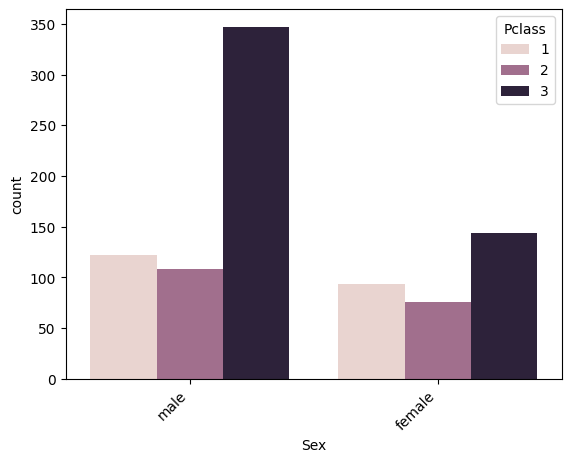

In [10]:
# نستورد المكتبتين Seaborn و Matplotlib لعمل الرسوم البيانية
import seaborn as sns
import matplotlib.pyplot as plt

# نستخدم دالة countplot من Seaborn لعرض عدد الأشخاص حسب الجنس ودرجة المقصورة
# نحط "x='Sex'" عشان نحدد الجنس كالمحور السيني، و "hue='Pclass'" عشان نخلي اللون يوضح درجات المقصورة
sns.countplot(data=df, x='Sex', hue='Pclass')

# نميل العناوين تحت المحور السيني ٤٥ درجة عشان تكون أوضح وتظهر بشكل مرتب
plt.xticks(rotation=45, ha='right')

# نعرض الرسم البياني
plt.show()


In [11]:
# نحول الأعمدة اللي فيها قيم غير رقمية لأعمدة رقمية باستخدام دالة get_dummies
# نستخدمها هنا لتحويل أعمدة "Sex" و "Embarked" إلى أعمدة رقمية عشان النماذج تفهم البيانات
# نحط "drop_first=True" عشان نتخلص من عمود واحد من الدummies لكل فئة ونتجنب مشكلة التعدد الخطي
pre_df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [12]:
# نحذف الأعمدة اللي ما نحتاجها في التحليل أو اللي ما تضيف معلومات مهمة للنماذج
# هنا حذفنا أعمدة "PassengerId", "Name", "Ticket", و "Cabin" عشان ما لها تأثير على التحليل
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# نحذف الصفوف اللي فيها قيم مفقودة في أعمدة "Age" و "Fare"
# حذفناها هنا عشان هذه الأعمدة مهمة وما نبي فيها بيانات ناقصة
df_cleaned = df_cleaned.dropna(subset=['Age', 'Fare'])


In [14]:
# نستورد دالة train_test_split من مكتبة scikit-learn لتقسيم البيانات
from sklearn.model_selection import train_test_split

# نفترض أن الهدف اللي نحاول التنبؤ به هو "Pclass" اللي يمثل درجة المقصورة
# نحط البيانات المدخلة (X) بعد ما نحذف عمود "Pclass" لأننا نبغى النماذج تتنبأ فيه
X = df.drop('Pclass', axis=1)  
y = df['Pclass']  # هذا هو العمود الهدف اللي نبي نتنبأ فيه

# نقسم البيانات إلى جزئين: جزء للتدريب وجزء للاختبار
# "test_size=0.33" يعني 33% من البيانات بتكون للاختبار و67% للتدريب
# "random_state=125" نحطه عشان نحصل على نفس التقسيم في كل مرة نشغل الكود
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)


In [18]:
# الخطوة 1: نشوف معلومات البيانات
# نعرض أسماء الأعمدة وأنواع البيانات اللي فيها عشان نفهم نوع البيانات اللي بنتعامل معها
print("Data Columns and Types:")
print(df.dtypes)

# الخطوة 2: نحذف الأعمدة اللي مالها داعي ونتعامل مع القيم الناقصة
# هنا نحذف الأعمدة 'Name', 'Ticket', و 'Cabin' لأنها تحتوي على بيانات نصية غالباً مالها فائدة للتنبؤ
df_cleaned = df.drop(columns=['Name', 'Ticket', 'Cabin'])  # حذف الأعمدة النصية

# نتأكد من عدد الصفوف والأعمدة بعد التنظيف عشان نشوف إذا العدد تغير
print("\nData Shape After Cleaning:", df_cleaned.shape)

# الخطوة 3: تحويل الأعمدة النصية إلى أرقام باستخدام one-hot encoding
# نحول أعمدة 'Sex' و 'Embarked' لأرقام باستخدام الدالة get_dummies عشان النموذج يقدر يفهمها
df_encoded = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# تقسيم البيانات إلى X و y
# نحدد الميزات (X) من خلال حذف العمود المستهدف 'Survived' 
# ونحدد العمود المستهدف (y) اللي هو 'Survived'
X = df_encoded.drop(columns=['Survived'])  # الميزات
y = df_encoded['Survived']  # المتغير المستهدف

# تقسيم البيانات إلى بيانات تدريب وبيانات اختبار
# نستخدم train_test_split لتقسيم البيانات بنسبة 80% للتدريب و 20% للاختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# الخطوة 5: تجهيز وتشغيل نموذج Gaussian Naive Bayes
# نستورد ونستخدم نموذج Gaussian Naive Bayes للتدريب على بيانات التدريب
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# تأكيد إتمام عملية التدريب
print("Model fitting completed successfully.")


Data Columns and Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data Shape After Cleaning: (891, 9)
Model fitting completed successfully.


In [19]:
# نستورد المقاييس لتقييم أداء النموذج من مكتبة scikit-learn
from sklearn.metrics import (
    accuracy_score,          # لحساب دقة النموذج
    confusion_matrix,        # لإنشاء مصفوفة التشابك
    ConfusionMatrixDisplay,   # لعرض مصفوفة التشابك
    f1_score,                # لحساب مقياس F1
    classification_report    # للحصول على تقرير مفصل عن الأداء
)

# نتنبأ بالقيم باستخدام النموذج المدرب ونخزن النتائج في y_pred
y_pred = model.predict(X_test)

# نحسب دقة النموذج (Accuracy) بناءً على النتائج المتوقعة ونتائج الاختبار
accuracy = accuracy_score(y_test, y_pred)
# نحسب مقياس F1 مع التوازن حسب عدد الفئات (average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# نعرض الدقة ومقياس F1 على الشاشة
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.770949720670391
F1 Score: 0.7711703785933829
